## Importing Basic Libraries

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Set Information:

The NASA data set comprises different size NASA 0012 airfoils at
various wind tunnel speeds and angles of attack. The span of the airfoil 
and the observer position were the same in all of the experiments.

## Import the Dataset

In [3]:
df=pd.read_csv('airfoil_self_noise.dat',sep='\t',header=None)

In [4]:
df

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [5]:
# Add column name
df.columns=['Frequency','Angle of attack','Chord length','Free-stream velocity','Suction side','pressure level']

In [6]:
df.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side,pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


## Basic EDA part

In [7]:
df.columns

Index(['Frequency', 'Angle of attack', 'Chord length', 'Free-stream velocity',
       'Suction side', 'pressure level'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Frequency             1503 non-null   int64  
 1   Angle of attack       1503 non-null   float64
 2   Chord length          1503 non-null   float64
 3   Free-stream velocity  1503 non-null   float64
 4   Suction side          1503 non-null   float64
 5   pressure level        1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [9]:
# To check datatypes
df.dtypes

Frequency                 int64
Angle of attack         float64
Chord length            float64
Free-stream velocity    float64
Suction side            float64
pressure level          float64
dtype: object

<AxesSubplot:>

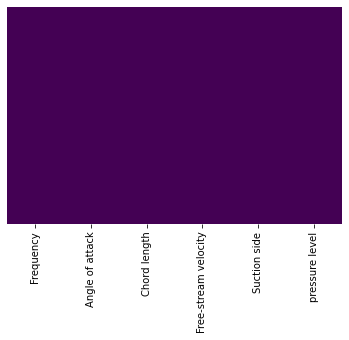

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
df.describe()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side,pressure level
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [12]:
df.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side,pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [13]:
# To check whether missing values or not in dataset
df.isnull().sum()

Frequency               0
Angle of attack         0
Chord length            0
Free-stream velocity    0
Suction side            0
pressure level          0
dtype: int64

In [14]:
# Divide dataset into Independent and Dependent features
x=df.iloc[:,:-1] #Independent features
y=df.iloc[:,-1]  #Dependent features

In [15]:
#train test split
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20)

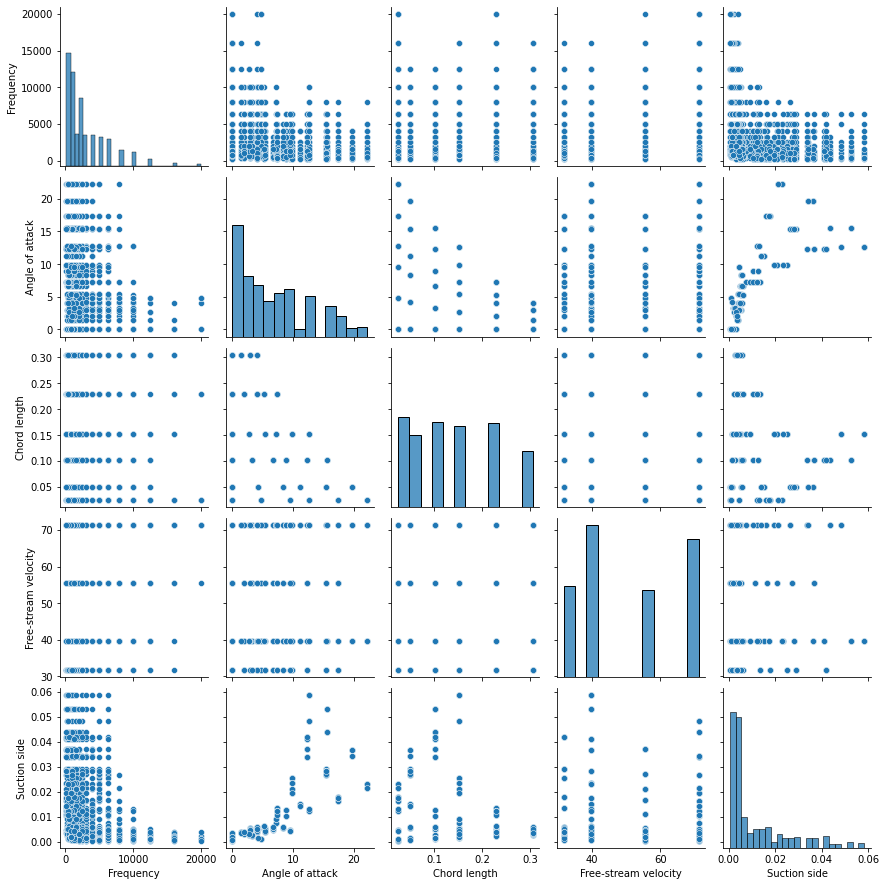

In [16]:
sns.pairplot(x_train)

In [17]:
x_train.corr()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side
Frequency,1.000000,-0.272767,0.002011,0.149468,-0.224227
Angle of attack,-0.272767,1.000000,-0.502797,0.047723,0.753174
Chord length,0.002011,-0.502797,1.000000,0.001670,-0.220844
Free-stream velocity,0.149468,0.047723,0.001670,1.000000,-0.025663
Suction side,-0.224227,0.753174,-0.220844,-0.025663,1.000000


In [18]:
# Relation b/w Frequency and output feature(pressure level)

C:\Users\radha\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Frequency', ylabel='pressure level'>

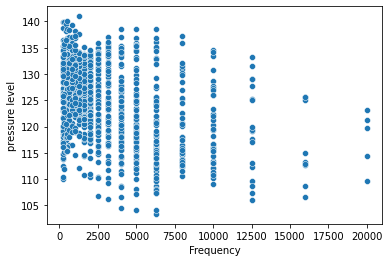

In [19]:
sns.scatterplot(x_train['Frequency'],y)

In [20]:
len(df['pressure level'].unique())

1456

#### Observation -
This is a Regression Problem Statement because o/p => continuos =>1456 category
if o/p have 20-30 category then it comes under Regresion Problem Statement

{'whiskers': [<matplotlib.lines.Line2D at 0x1af810514a8>,
 'caps': [<matplotlib.lines.Line2D at 0x1af810517f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1af81051208>],
 'medians': [<matplotlib.lines.Line2D at 0x1af81051dd8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1af8105b3c8>],
 'means': []}

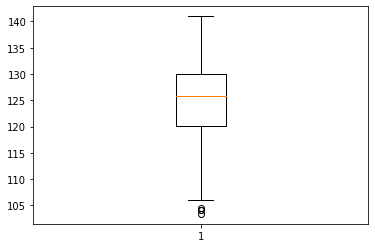

In [21]:
plt.boxplot(df['pressure level'])

# Creating Model By - 

## Applying Different-2 Algorithm on Dataset

In [22]:
#BASIC IMPORTS
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
from sklearn.metrics import r2_score
Parameters={'alpha':[1e-15,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

### Linear Regression

In [23]:

from sklearn.linear_model import LinearRegression
#Feature Scaling
scaled_feature=scaler.fit_transform(df.drop('pressure level',axis=1))
# Train-Test-Split
x_train,x_test,y_train,y_test=train_test_split(scaled_feature,df['pressure level'],test_size=0.30)
scaler.fit_transform(x_train)
scaler.transform(x_test) 
linear_regression=LinearRegression()
linear_regression.fit(x_train,y_train)
mse=cross_val_score(linear_regression,x_train,y_train,scoring='neg_mean_squared_error',cv=5)
mse
np.mean(mse)

-23.03787874548957

In [24]:
#Predicting Test data
prediction_linear=linear_regression.predict(x_test)
# Accuracy
r2_score(y_test,prediction_linear)

0.4772622551689528

### Ridge Regression

In [25]:

from sklearn.linear_model import Ridge
ridge=Ridge() #object

#Feature Scaling
scaled_feature=scaler.fit_transform(df.drop('pressure level',axis=1))
# Train-Test-Split
x_train,x_test,y_train,y_test=train_test_split(scaled_feature,df['pressure level'],test_size=0.30)
scaler.fit_transform(x_train)
scaler.transform(x_test)
ridge_regressor=GridSearchCV(ridge,Parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x_train,y_train)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 5}
-22.58869475723326


In [26]:
#Predicting Test data
prediction_ridge=ridge_regressor.predict(x_test)
# Accuracy
r2_score(y_test,prediction_ridge)

0.442647176427742

### Lasso Regression

In [27]:

from sklearn.linear_model import Lasso
lasso=Lasso() #object
# Feature Scaling
scaled_feature=scaler.fit_transform(df.drop('pressure level',axis=1))
# Train-Test-Split
x_train,x_test,y_train,y_test=train_test_split(scaled_feature,df['pressure level'],test_size=0.30)
scaler.fit_transform(x_train)
scaler.transform(x_test)
lasso_regressor=GridSearchCV(lasso,Parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(x_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

#Predicting Test data
prediction_lasso=lasso_regressor.predict(x_test)
# Accuracy
r2_score(y_test,prediction_lasso)

C:\Users\radha\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.071e+03, tolerance: 3.940e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\radha\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.287e+03, tolerance: 3.916e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\radha\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

{'alpha': 1e-15}
-22.986964607217203


C:\Users\radha\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.676e+02, tolerance: 4.843e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.5213387526421838

### Elasticnet 

In [28]:

from sklearn.linear_model import ElasticNet
elasticnet=ElasticNet()
# Feature Scaling
scaled_feature=scaler.fit_transform(df.drop('pressure level',axis=1))
# Train-Test-Split
x_train,x_test,y_train,y_test=train_test_split(scaled_feature,df['pressure level'],test_size=0.30)
scaler.fit_transform(x_train)
scaler.transform(x_test)
elasticnet_regressor=GridSearchCV(elasticnet,Parameters,scoring='neg_mean_squared_error',cv=5)
elasticnet_regressor.fit(x_train,y_train)
print(elasticnet_regressor.best_params_)
print(elasticnet_regressor.best_score_)

#Predicting Test data
prediction_elasticnet=elasticnet_regressor.predict(x_test)
# Accuracy
r2_score(y_test,prediction_elasticnet)

C:\Users\radha\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.671e+03, tolerance: 4.160e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\radha\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.712e+03, tolerance: 4.051e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\radha\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

{'alpha': 0.01}
-22.769298651449127


0.4715288198971548

### Decision Tree Regressor

In [29]:

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
D_regressor=DecisionTreeRegressor()
D_regressor.fit(x_train,y_train)
MSE=cross_val_score(D_regressor,x_train,y_train,scoring='neg_mean_squared_error',cv=5)

#Predicting Test data
prediction_DT=D_regressor.predict(x_test)
# Accuracy
r2_score(y_test,prediction_DT)

0.8267612984684697

### KNN - Regressor

In [30]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=2)

# Feature Scaling
scaled_feature=scaler.fit_transform(df.drop('pressure level',axis=1))

#Train -Test -Split
x_train,x_test,y_train,y_test=train_test_split(scaled_feature,df['pressure level'],test_size=0.30)
scaler.fit_transform(x_train)
scaler.transform(x_test) 
knn.fit(x_train,y_train)

#Predicting Test data
pred=knn.predict(x_test)

# Accuracy
r2_score(y_test,pred)

0.8549376021651613

### Random Forest Regressor

In [31]:

from sklearn.ensemble import RandomForestRegressor
rf_regressor=RandomForestRegressor() #object
rf_regressor.fit(x_train,y_train)

#Predicting Test data
prediction_rf=rf_regressor.predict(x_test)

# Accuracy
r2_score(y_test,prediction_rf)


0.9243046770576391

### SVM-SVR

In [32]:

from sklearn.svm import SVR
#Feature Scaling

scaled_feature=scaler.fit_transform(df.drop('pressure level',axis=1))

#train - test - split

x_train,x_test,y_train,y_test=train_test_split(scaled_feature,df['pressure level'],test_size=0.30)
scaler.fit_transform(x_train)
scaler.transform(x_test) 

regressor=SVR(kernel="linear")
regressor.fit(x_train,y_train)
#Predicting Test data
svr_prediction=regressor.predict(x_test)
# Accuracy
r2_score(y_test,svr_prediction)

0.5282166723885652

# Converting Model into A File

In [33]:
import pickle

In [34]:
pickle.dump(rf_regressor,open('Airfoil_Self_Noise.pkl','wb'))

In [35]:
pickled_model=pickle.load(open('Airfoil_Self_Noise.pkl','rb'))
#Batch input
#pickled_model.predict(x_test)
x_test

array([[-0.12260118,  0.2734372 , -0.91699924, -1.23080896, -0.40561217],
       [-0.71596486, -1.14640293,  0.16952016, -1.23080896, -0.68811254],
       [-0.51923465, -1.14640293,  1.79929926, -1.23080896, -0.59541339],
       ...,
       [-0.59856135, -0.47028859,  0.98440971,  0.29800701, -0.52135661],
       [-0.71596486, -0.33506572, -1.18862909, -0.72334483, -0.77837481],
       [-0.81591649,  0.08750575,  0.98440971, -0.72334483,  0.09190876]])

In [36]:
x_train


array([[ 1.62258612, -0.89286005,  1.79929926,  1.31293526, -0.59125771],
       [ 0.67066578, -1.14640293, -1.18862909,  1.31293526, -0.81692634],
       [ 2.25719968, -0.43648287, -0.91699924, -0.72334483, -0.73125617],
       ...,
       [-0.71596486, -1.14640293,  0.98440971,  0.29800701, -0.67295112],
       [ 1.08316459, -0.63931717,  1.79929926, -1.23080896, -0.44460696],
       [-0.85240677,  0.93264869, -0.37373954, -1.23080896,  2.33805337]])

In [37]:
# How do we work with single input

In [38]:
dict_test={
    "Frequency":800,
    "Angle of attack":0.0,
    "Chord length":0.3048,
    "Free-streem velocity":71.3,
    "suction side":0.002663
}

In [39]:
dict_test

{'Frequency': 800,
 'Angle of attack': 0.0,
 'Chord length': 0.3048,
 'Free-streem velocity': 71.3,
 'suction side': 0.002663}

In [40]:
[list(dict_test.values())]

[[800, 0.0, 0.3048, 71.3, 0.002663]]

In [41]:
dict_test.keys()

dict_keys(['Frequency', 'Angle of attack', 'Chord length', 'Free-streem velocity', 'suction side'])

In [42]:
pickled_model.predict([list(dict_test.values())])[0]

109.90755000000011

In [43]:
pickle.dump(knn,open('Airfoil_Self_Noise1.pkl','wb'))

In [44]:
pickled_model1=pickle.load(open('Airfoil_Self_Noise1.pkl','rb'))
#Batch input
#pickled_model1.predict(x_test)

In [45]:
pickled_model1.predict([list(dict_test.values())])[0]

112.05599999999998

In [46]:
pickled_model.predict([list(dict_test.values())])[0]

109.90755000000011

In [47]:
pickle.dump(linear_regression,open('Airfoil_Self_Noise2.pkl','wb'))
pickled_model2=pickle.load(open('Airfoil_Self_Noise2.pkl','rb'))
#Batch input
#pickled_model2.predict(x_test)
pickled_model2.predict([list(dict_test.values())])[0]

-3033.019606225002

In [48]:
pickle.dump(ridge_regressor,open('Airfoil_Self_Noise3.pkl','wb'))
pickled_model3=pickle.load(open('Airfoil_Self_Noise3.pkl','rb'))
pickled_model3.predict([list(dict_test.values())])[0]
#Batch input
#pickled_model3.predict(x_test)

-3093.7958316106565

In [49]:
pickle.dump(lasso_regressor,open('Airfoil_Self_Noise4.pkl','wb'))
pickled_model4=pickle.load(open('Airfoil_Self_Noise4.pkl','rb'))
#Batch input
#pickled_model4.predict(x_test)
pickled_model4.predict([list(dict_test.values())])[0]

-2970.952427396747

In [50]:
pickle.dump(regressor,open('Airfoil_Self_Noise5.pkl','wb'))
pickled_model5=pickle.load(open('Airfoil_Self_Noise5.pkl','rb'))
#Batch input
#pickled_model5.predict(x_test)
pickled_model5.predict([list(dict_test.values())])[0]

-3451.6465128712475

In [51]:
pickle.dump(D_regressor,open('Airfoil_Self_Noise6.pkl','wb'))
pickled_model6=pickle.load(open('Airfoil_Self_Noise6.pkl','rb'))
#Batch input
#pickled_model6.predict(x_test)
pickled_model6.predict([list(dict_test.values())])[0]

109.63799999999999

In [ ]:
7 3
1 2 3 4 5 6 7

In [13]:
def test():
    total_ladoo=0
    N, M = input().split()
    Sum = list(map(int, input().split()))
    for i in Sum:
        total_ladoo=total_ladoo+i
    return total_ladoo%3
test()

5 10
7 7 7 7 7


2